# FRED Data Analysis Project
This notebook handles data retrieval, processing, and analysis for the FRED project.

# Imports and project set-up

In [1]:
import os
import sys
import requests
from datetime import datetime
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
from fpdf import FPDF
from PIL import Image

In [2]:
# Determine the main project folder (one level above the notebooks/ folder)
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Define folders relative to the main project directory
data_dir = os.path.join(project_dir, "data")
results_dir = os.path.join(project_dir, "results")
scripts_dir = os.path.join(project_dir,"scripts")

# Add the project directory to the Python path
sys.path.insert(0, project_dir)

# Add folder to the Python path
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

if results_dir not in sys.path:
    sys.path.append(results_dir)
    
# print("Folders added to sys.path:")
# print("\n".join(sys.path))
#print(sys.path)

In [3]:
# Create folders if they don't exist
for folder in [data_dir, results_dir, scripts_dir]:
    os.makedirs(folder, exist_ok=True)

print(f"Project directory: {project_dir}")
print(f"Data directory: {data_dir}")
print(f"Results directory: {results_dir}")
print(f"Scripts directory: {scripts_dir}")


Project directory: /data/data/com.termux/files/home/projects/fred_data_project
Data directory: /data/data/com.termux/files/home/projects/fred_data_project/data
Results directory: /data/data/com.termux/files/home/projects/fred_data_project/results
Scripts directory: /data/data/com.termux/files/home/projects/fred_data_project/scripts


In [4]:
# Set up fred environment
import fred_config

Fred class loaded: <class 'fredapi.fred.Fred'>


In [5]:
# Load charting config
from charting import create_chart

In [6]:
# Load tables config 

from tables import create_comparison_table
from tables import create_analysis_table

In [7]:
# PDF creator config

from pdf_report import PDFReportGenerator, create_report 

# Data loading

In [8]:
# Fetch the FRED data for US yields

series_ids = ["DFF","DGS3MO","DGS1","DGS2", "DGS5","DGS7","DGS10"]
us_yields = fred_config.fetch_fred_data(series_ids, start_date="", frequency="")

#us_yields.rename(columns=fred_config.FRED_SERIES, inplace=True)


Starting download of 7 series...
Completed 1/7: DFF
Completed 2/7: DGS3MO
Completed 3/7: DGS1
Completed 4/7: DGS2
Completed 5/7: DGS5
Completed 6/7: DGS7
Completed 7/7: DGS10
Download completed in 35.26 seconds
Successfully downloaded 7 out of 7 series


In [9]:
# Print yields
print(us_yields.head())  # Inspect the first few rows


             DFF  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10
1954-07-01  1.13     NaN   NaN   NaN   NaN   NaN    NaN
1954-07-02  1.25     NaN   NaN   NaN   NaN   NaN    NaN
1954-07-03  1.25     NaN   NaN   NaN   NaN   NaN    NaN
1954-07-04  1.25     NaN   NaN   NaN   NaN   NaN    NaN
1954-07-05  0.88     NaN   NaN   NaN   NaN   NaN    NaN


In [10]:
# Fetch US corporate yields

series_ids = ["BAMLC0A1CAAAEY","BAMLC0A2CAAEY", "BAMLC0A3CAEY","BAMLC0A4CBBBEY","BAMLH0A1HYBBEY","BAMLH0A2HYBEY","BAMLH0A3HYCEY"]
us_corp_yields = fred_config.fetch_fred_data(series_ids, start_date="", frequency="")

#us_yields.rename(columns=fred_config.FRED_SERIES, inplace=True)


Starting download of 7 series...
Completed 1/7: BAMLC0A1CAAAEY
Completed 2/7: BAMLC0A2CAAEY
Completed 3/7: BAMLC0A3CAEY
Completed 4/7: BAMLC0A4CBBBEY
Completed 5/7: BAMLH0A1HYBBEY
Completed 6/7: BAMLH0A2HYBEY
Completed 7/7: BAMLH0A3HYCEY
Download completed in 18.31 seconds
Successfully downloaded 7 out of 7 series


In [11]:
# Print yields
print(us_corp_yields.head())  # Inspect the first few rows


            BAMLC0A1CAAAEY  BAMLC0A2CAAEY  BAMLC0A3CAEY  BAMLC0A4CBBBEY  \
1996-12-31            6.72           6.82          6.97            7.26   
1997-01-01             NaN            NaN           NaN             NaN   
1997-01-02            6.80           6.92          7.06            7.36   
1997-01-03            6.80           6.90          7.04            7.34   
1997-01-06            6.80           6.92          7.06            7.37   

            BAMLH0A1HYBBEY  BAMLH0A2HYBEY  BAMLH0A3HYCEY  
1996-12-31            8.36          10.01          13.97  
1997-01-01             NaN            NaN            NaN  
1997-01-02            8.43          10.00          13.95  
1997-01-03            8.43          10.01          14.02  
1997-01-06            8.45          10.05          14.03  


# Data processing

# Analysis

# US Gov Yields Charts and Tables

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DFF_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS3MO_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS1_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS2_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS5_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS7_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS10_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/us_yields_chart.png


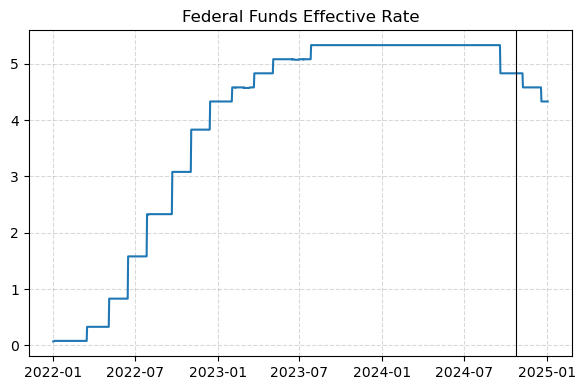

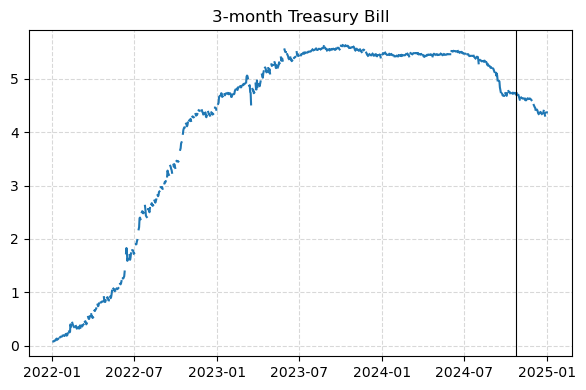

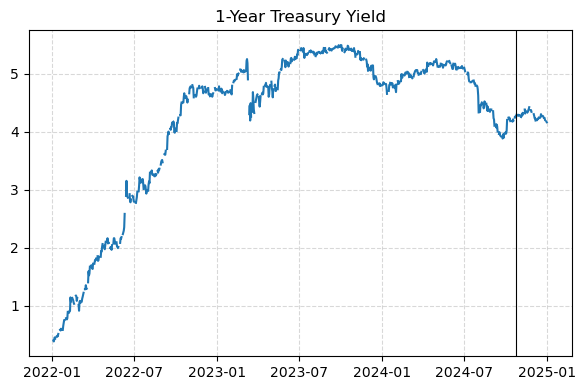

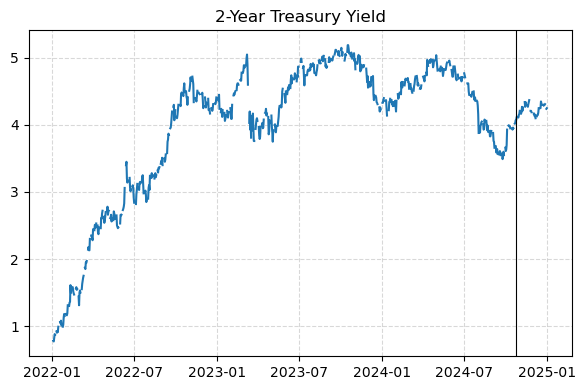

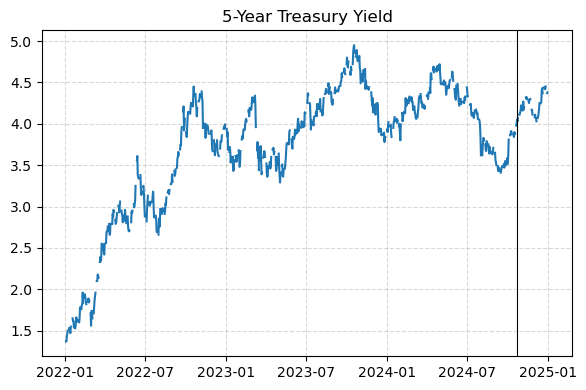

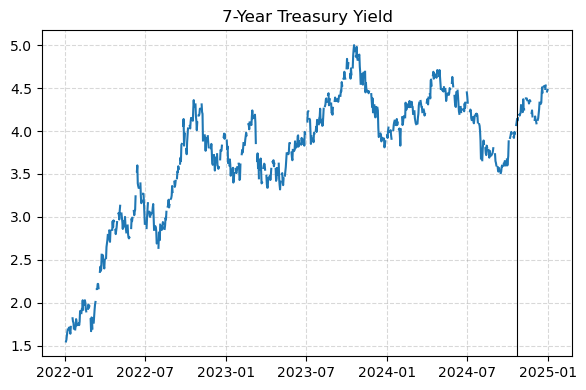

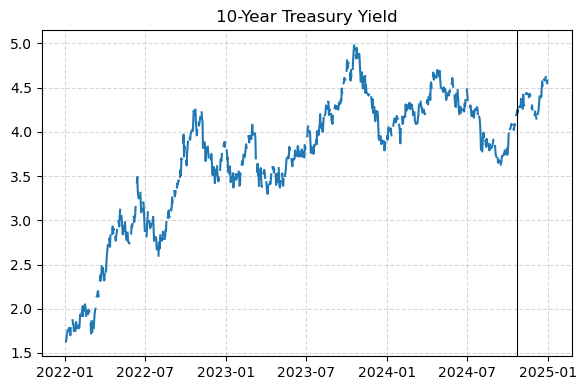

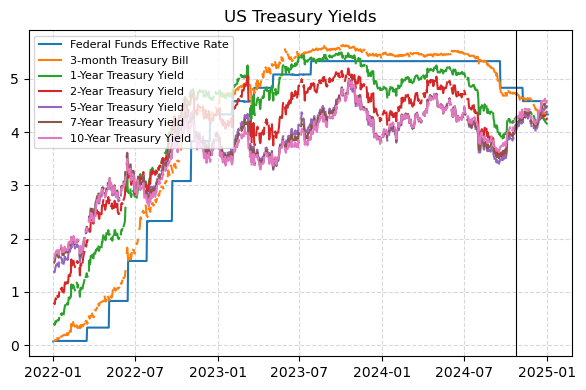

In [12]:
# US yields charts

# Extract column names from the DataFrame
us_yields_ids = us_yields.columns.tolist()

# Set chart parameters
vline = ["2024-10-23"]
custom_dates = ["2024-12-11", "2024-10-23","2024-09-4","2024-07-24","2024-04-10"]  # dates to include in tables
start_date = "2022-01-01"

# Loop to create individual charts for each series
for series in us_yields_ids:
    create_chart(us_yields, [series], start_date=start_date, show_data_label=False,
                 title=None, vlines=vline, show_table=False, custom_dates=custom_dates,
                 save_path=f"{results_dir}/{series}_chart.png")

# Create a single chart for the entire group
create_chart(us_yields, us_yields_ids, start_date=start_date, title="US Treasury Yields",
             show_data_label=False, vlines=vline, show_table=False, custom_dates=custom_dates,
             save_path=f"{results_dir}/us_yields_chart.png")


In [13]:
# All yields table
title = "Treasury Yield Current Values and Change vs. Certain Dates"
output_file = f"{results_dir}/us_yields_table.png"

create_comparison_table(us_yields, us_yields_ids, custom_dates, title, output_file)


Table saved to /data/data/com.termux/files/home/projects/fred_data_project/results/us_yields_table.png


In [14]:
# 10-year table

start_date = "2024-10-23"
series = "DGS10"
save_path = f"{results_dir}/{series}_table.png"
# Generate the table
create_analysis_table(series, start_date, us_yields,save_path)


Table saved to /data/data/com.termux/files/home/projects/fred_data_project/results/DGS10_table.png


In [15]:
# 2-year yield table

start_date = "2024-10-23"
series = "DGS2"
save_path = f"{results_dir}/{series}_table.png"
# Generate the table
create_analysis_table(series, start_date, us_yields,save_path)


Table saved to /data/data/com.termux/files/home/projects/fred_data_project/results/DGS2_table.png


# US Corp Yields Charts and Tables

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/BAMLC0A1CAAAEY_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/BAMLC0A2CAAEY_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/BAMLC0A3CAEY_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/BAMLC0A4CBBBEY_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/BAMLH0A1HYBBEY_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/BAMLH0A2HYBEY_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/BAMLH0A3HYCEY_chart.png
Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/us_corp_yields_chart.png


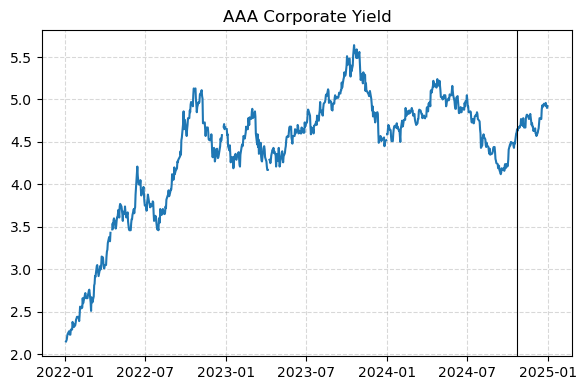

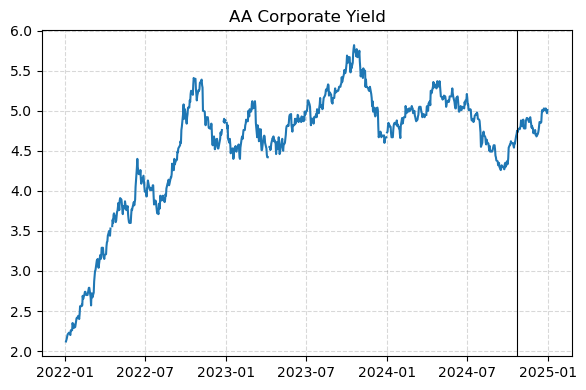

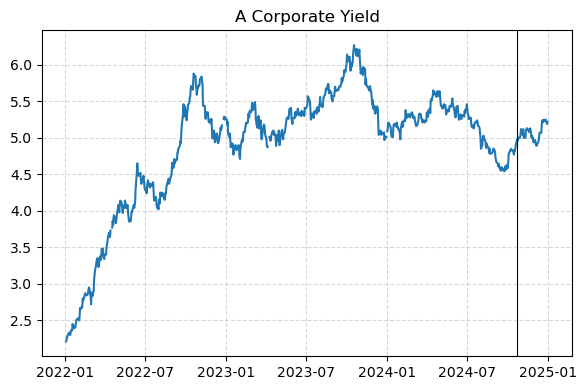

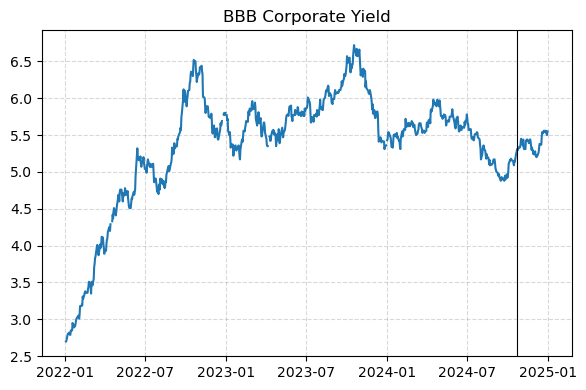

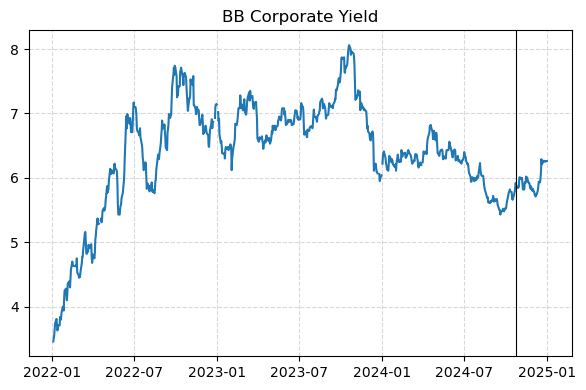

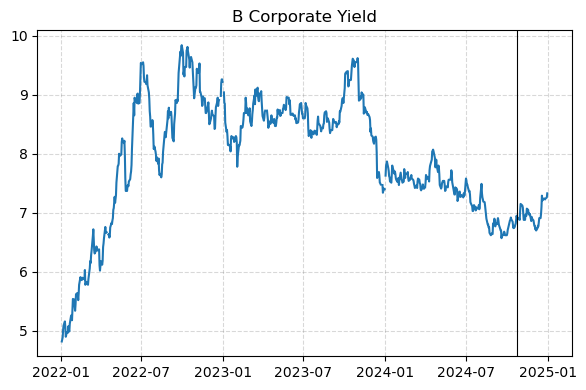

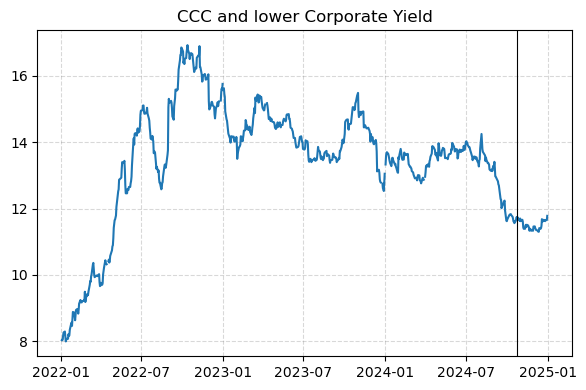

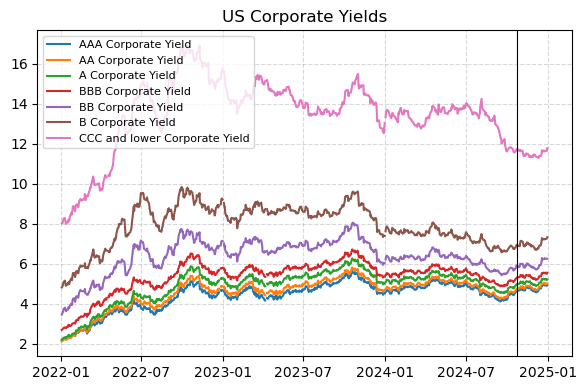

In [16]:
# US corp yields charts

# Extract column names from the DataFrame
us_corp_yields_ids = us_corp_yields.columns.tolist()

# Set chart parameters
vline = ["2024-10-23"]
custom_dates = ["2024-12-11", "2024-10-23","2024-09-4","2024-07-24","2024-04-10"]  # dates to include in tables
start_date = "2022-01-01"

# Loop to create individual charts for each series
for series in us_corp_yields_ids:
    create_chart(us_corp_yields, [series], start_date=start_date, show_data_label=False,
                 title=None, vlines=vline, show_table=False, custom_dates=custom_dates,
                 save_path=f"{results_dir}/{series}_chart.png")

# Create a single chart for the entire group
create_chart(us_corp_yields, us_corp_yields_ids, start_date=start_date, title="US Corporate Yields",
             show_data_label=False, vlines=vline, show_table=False, custom_dates=custom_dates,
             save_path=f"{results_dir}/us_corp_yields_chart.png")


In [17]:
# All corp yields table
title = ""
output_file = f"{results_dir}/us_corp_yields_table.png"

create_comparison_table(us_corp_yields, us_corp_yields_ids, custom_dates, title, output_file)


Table saved to /data/data/com.termux/files/home/projects/fred_data_project/results/us_corp_yields_table.png


# Reporting

In [19]:
# Report 
sections = [
    {
        'title': 'US Government Yields',
        'image_configs': [
            [f"{results_dir}/DFF_chart.png",f"{results_dir}/DGS3MO_chart.png"],
            [f"{results_dir}/DGS2_chart.png", f"{results_dir}/DGS5_chart.png"],
            [f"{results_dir}/DGS10_chart.png",f"{results_dir}/us_yields_chart.png"],
            f"{results_dir}/us_yields_table.png",
            [f"{results_dir}/DGS2_table.png",f"{results_dir}/DGS10_table.png"]# Two images in one row
        ]
    },
    {
        'title': 'US Corporate Yields (ICE BoA)',
        'image_configs': [
            [f"{results_dir}/BAMLC0A1CAAAEY_chart.png",f"{results_dir}/BAMLC0A4CBBBEY_chart.png"],
            [f"{results_dir}/BAMLH0A3HYCEY_chart.png",f"{results_dir}/us_corp_yields_chart.png"],
            f"{results_dir}/us_corp_yields_table.png"
        ]
    }
]

# Create the report
create_report(
    'market_update.pdf',
    sections,
    report_title='Market Update'
)